# Imports

In [169]:
# Librairies
import numpy as np
import pandas as pd
import scipy.stats as st
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [170]:
# URLs
exports = 'D:\Drive\Colab Notebooks\oc\p4\exports\\'
local = 'sources/'
github = 'https://raw.githubusercontent.com/gllmfrnr/oc/master/p4/sources/'

In [171]:
# Dataframes
clients =       pd.read_csv(local + 'customers.csv')
produits =        pd.read_csv(local + 'products.csv')    
transactions =    pd.read_csv(local + 'transactions.csv')

In [172]:
# Styles
# Exemple : print(color.bold + 'Hello' + color.end)
class style:
   blue = '\033[94m'
   green = '\033[92m'
   red = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m' 

indigo_A100 = '#8c9eff'
purple_A100 = '#ea80fc'

## Fonctions

### Exploration

In [173]:
# Vérification et suppression de duplicats
def duplicats(df):
  print(  # Vérifier présence de duplicats
      len(df), 'lignes avant suppression \n' +
      'Nombre de duplicats :', len(df) - len(df.drop_duplicates())    
  )
  df.drop_duplicates(inplace=True)  # Suppression des duplicats
  print(len(df), 'lignes après suppression')

In [174]:
# Exploration des datasets
def exploration(df):
    print( 
        style.red + 'SAMPLE ↓ \n' + style.end,
        df.sample(3), '\n'                                              # Sample
        ) 
    print(style.red + 'INFO ↓ \n' + style.end)
    print(df.info(), '\n')                                              # Colonnes, null-count, types d'objets
    for i in range(0, len(df.columns)):
        print(
            style.red + 'COLONNE',
            style.bold + df.columns[i], ': \n' + style.end,             # Nom de colonne
             df.iloc[:, i].describe(), '\n',                            # .describe()
            sum(df.iloc[:, i].isna()), 'Nan \n',                        # Nbre de Nan 
            df.shape[0] - np.count_nonzero(df.iloc[:, i]), 'zéros \n',  # Nbre de 0
            len(df.iloc[:, i].unique()), 'valeurs uniques : \n'#,
            #df.iloc[:, i].unique(), '\n'                                # Nombre de valeurs uniques 
        )

In [175]:
# Exploration des datasets
def exploration(df):
    print( 
        style.red + 'SAMPLE ↓ \n' + style.end,
        df.sample(3), '\n'                                              # Sample
        ) 
    print(style.red + 'INFO ↓ \n' + style.end)
    print(df.info(), '\n')                                              # Colonnes, null-count, types d'objets
    for i in range(0, len(df.columns)):
        print(
            style.red + 'COLONNE',
            style.bold + df.columns[i], ': \n' + style.end,             # Nom de colonne
             df.iloc[:, i].describe(), '\n',                            # .describe()
            sum(df.iloc[:, i].isna()), 'Nan \n',                        # Nbre de Nan 
            df.shape[0] - np.count_nonzero(df.iloc[:, i]), 'zéros \n',  # Nbre de 0
            len(df.iloc[:, i].unique()), 'valeurs uniques : \n'#,
            #df.iloc[:, i].unique(), '\n'                                # Nombre de valeurs uniques 
        )

In [176]:
# Vérification de la clé primaire
def check_pk(df_pk):
  table_length = len(df_pk) - len(df_pk.drop_duplicates())
  if table_length == 0:
    print(style.green + 'C\'est bien une clé primaire (0 duplicat)' + style.end)
  else:
    print(
        style.red + 'Ce n\'est pas une clé primaire (',
        table_length, 'duplicats )' + style.end
        )

### Indicateurs

In [177]:
# Indicateurs univariés

def indicateurs(df, variable):
    
    # Paramètres de position
    mode = df[variable].mode().to_list()
    frequence_mode = round((len(df[df[variable]==mode[0]]) / len(df) * 100), 1)
    moyenne = round(df[variable].mean(), 1)
    mediane = df[variable].median()
    quartile_1 = round(df[variable].quantile(0.25), 1)
    quartile_3 = round(df[variable].quantile(0.75), 1)
      
    # Paramètres de dispersion
    minimum = df[variable].min()
    maximum = df[variable].max()
    etendue = round((maximum - minimum), 1)
    variance = round(df[variable].var(ddof=0), 1)
    ecart_type = round(df[variable].std(ddof=0), 1)
    coeff_variation = round(df[variable].std(ddof=0) / df[variable].mean(), 1)
    
    skewness = round(df[variable].skew(), 1)
    if skewness > 0:
        skewness_symetrie = 'étalée à droite'
    elif skewness < 0:
        skewness_symetrie = 'étalée à gauche'
    else:
        skewness_symetrie = 'symétrique'
        
    kurtosis = round(df[variable].kurtosis(), 1)
    if kurtosis > 0:
        kurtosis_aplatissement = 'moins aplatie que la normale gaussienne'
    elif kurtosis < 0:
        kurtosis_aplatissement = 'plus aplatie que la normale gaussienne'
    else:
        kurtosis_aplatissement = 'normale (gaussienne)'
        
    # Affichage
    print(
        style.bold + 'Indicateurs de position :' + style.end,
        '\nMode(s) :', mode, '(fréquence :', frequence_mode, '%)',        
        '\nMoyenne :', moyenne, '\nMédiane :', mediane,
        '\n1er quartile :', quartile_1, '\n3ème quartile :', quartile_3,
        
        style.bold + '\nIndicateurs de dispersion :' + style.end,
        '\nMinimum :', minimum, '\nMaximum :', maximum, '\nÉtendue :', etendue,
        '\nVariance :', variance, '\nÉcart-type : ', ecart_type,
        '\nCoeff. de variation :', coeff_variation,
        '\nSkewness :', skewness, '( distribution', skewness_symetrie, ')',
        '\nKurtosis :', kurtosis, '( distribution', kurtosis_aplatissement, ')'
    )

In [178]:
# Indicateurs bivariés
def indicateurs_bivaries(df, variable_1, variable_2):
    for mode in df[variable_1].unique():
        subset = df[df[variable_1] == mode]
        print(
            style.bold + style.blue + 'Modalité :' + style.end, mode,
            '(fréquence :', round((len(subset) / len(df) * 100), 1), '%)\n'
        ),
        indicateurs(subset, variable_2), 
        print('\n')

In [179]:
# Pearson
from varname import Wrapper
def pearson(df, variable_1, variable_2):

    # Noms des variables
    var_1_name = Wrapper(variable_1)
    var_2_name = Wrapper(variable_2)
    
    # Coefficient de corrélation linéaire (Pearson)
    print(
        'Coeff. de corrélation de Pearson :\n'
        'Sur ' + style.bold + df.name + style.end + ', entre',
        var_1_name, 'et', var_2_name, ':',
        round((st.pearsonr(df[variable_1], df[variable_2])[0]), 2),
        '\n'
    )
        
    # Matrice de covariance [2ème ligne, 1ère colonne]
    np.cov(df[variable_1], df[variable_2])[1,0]

In [180]:
#???????????????????????????????????????????????????????????????????
#???????????????????????????????????????????????????????????????????
#???????????????????????????????????????????????????????????????????

# Courbe de Lorenz et indice de Gini
def lorenz(observations):

  # Nombre d'observations
  n = len(observations)

  # LORENZ ↓↓

  #   ↓ Définir ordonnées
  #   Trier les individus par ordre croissant : np.sort()
  #   Calculer la somme cumulée : np.cumsum()
  #   Normaliser en divisant par la somme totale des observations : / .sum()
  lorenz = np.cumsum(np.sort(observations)) / observations.sum()
  #   La courbe de Lorenz débute à 0 (ajouter valeur 0 avant liste précédente)
  lorenz = np.append([0], lorenz)

  #   ↓ Définir ordonnées, de 0 à 1 à intervalles réguliers
  xaxis = np.linspace(0-1 / n, 1+1 / n, n+1)

  # GINI
  #     Surface sous la courbe de Lorenz
  AUC = (lorenz.sum() - lorenz[-1]/2 -lorenz[0]/2) / n
  #     Surface entre la 1ère bissectrice et la courbe de Lorenz
  S = 0.5 - AUC
  gini = 2*S

  # Afficher la courbe
  plt.axes().axis('equal')
  plt.plot(xaxis, lorenz, drawstyle='steps-post')
  plt.ylim([0,1])
  plt.show()

  print('Indice de Gini :', round(gini, 1))

# Exploration

## Suppression des duplicats
- On vérifie ces duplicats avant l'exploration, pour permettre de définir les clés primaires
- Seule la table **transactions** contient des duplicats, qu'on supprime

In [181]:
# customers
duplicats(clients)

# --> Aucun duplicat

8623 lignes avant suppression 
Nombre de duplicats : 0
8623 lignes après suppression


In [182]:
# products
duplicats(produits)

# --> Aucun duplicat

3287 lignes avant suppression 
Nombre de duplicats : 0
3287 lignes après suppression


In [183]:
# transactions
duplicats(transactions)

# --> Présence de 126 duplicats, on les supprime

337016 lignes avant suppression 
Nombre de duplicats : 126
336890 lignes après suppression


## Clients
- 3 variables : *'client_id'*, *'Sexe'* et *'Naissance'*
- 2 modalités dans *'Sexe'* : f ou h
- Dans *'Naissance'*, années s'étalant de 1929 à 2004
- Aucune valeur manquante ou aberrante
- Aucun doublon dans *'client_id'*
- Clé primaire : *'client_id'*

In [184]:
# Renommer les colonnes
clients.rename(columns={'sex': 'Sexe', 'birth': 'Naissance'}, inplace=True)
clients.sample(5)

,client_id,Sexe,Naissance
604,c_7783,m,1996
8560,c_4466,m,1960
515,c_4793,f,1988
1526,c_2474,m,1988
3645,c_3498,m,1990


In [185]:
# Exploration du dataset
# exploration(clients)

# --> Aucun doublon dans la variable 'client_id'
# --> 2 valeurs possibles dans 'sex' : f ou m
# --> Valeurs de 1929 à 2004 dans 'birth'
# --> Aucune valeur manquante
# --> Aucune valeur aberrante

In [186]:
# Vérification de la clé primaire
check_pk(clients['client_id'])

C'est bien une clé primaire (0 duplicat)


In [187]:
# Année en cours
year = datetime.now().year

# Création d'une colonne incluant l'âge de chaque client
clients['Âge'] = year - clients['Naissance']

clients.sample(5)

,client_id,Sexe,Naissance,Âge
75,c_651,m,1964,56
193,c_7046,m,1996,24
8508,c_6236,f,1976,44
4104,c_3139,f,1995,25
6415,c_7233,f,2001,19


## Produits
- 3 variables : *'id_prod'*, *'Prix'* et *'Catégorie'*
- 3 modalités dans *'Catégorie'* : 0, 1 et 2
- Valeurs aberrantes dans *'Prix'* (car inférieures à 0)
- Aucune valeur manquante
- Aucun doublon dans *'id_prod'*
- Clé primaire : *'id_prod'*

In [188]:
# Renommer les colonnes
produits.rename(columns={'price': 'Prix', 'categ': 'Catégorie'}, inplace=True)
produits.sample(5)

,id_prod,Prix,Catégorie
2530,0_1233,21.99,0
520,1_41,11.99,1
1341,0_1060,12.53,0
1961,1_290,32.79,1
1761,1_267,27.99,1


In [189]:
# Exploration du dataset
#exploration(produits)

# --> Aucun doublon dans la variable 'id_prod'
# --> Valeurs aberrantes dans 'price' (inférieures à 0)
# --> 3 valeurs possibles dans 'categ' : 0, 1, 2
# --> Aucune valeur manquante

In [190]:
# Vérification de la clé primaire
check_pk(produits['id_prod'])

C'est bien une clé primaire (0 duplicat)


## Transactions
- 4 variables : *'id_prod'*, *'Date'*, *'session_id'* et *'client_id'*
- *'id_prod'* et *'client_id'* sont des clés étrangères vers **produits** et **clients**
- Il y a moins de valeurs uniques dans ces variables que dans les tables qu'elles référencent (certains clients n'ont pas passé commande, certains produits n'ont pas été vendus)
- Valeurs aberrantes dans *'Date'* (dates ayant 'test_' pour préfixe')
- Aucune valeur manquante

In [191]:
# Renommer les colonnes
transactions.rename(columns={'date': 'Date'}, inplace=True)
transactions.sample(5)

,id_prod,Date,session_id,client_id
44858,0_1352,2021-06-19 17:23:49.410480,s_50917,c_1370
189387,0_1545,2021-05-14 20:53:11.471965,s_34546,c_1609
276582,1_164,2021-03-20 22:56:46.303260,s_9179,c_1609
130093,0_1376,2021-08-12 04:57:30.478939,s_74612,c_3296
193838,0_1603,2021-09-30 09:51:36.441509,s_97861,c_7381


In [192]:
# Exploration du dataset
#exploration(transactions)

# --> id_prod et client_id sont des clés étrangères vers products et customers
# --> Moins de valeurs uniques dans ces variables que dans celles des tables référencées
# --> Aucune valeur manquante

In [193]:
# Vérification de la clé primaire
check_pk(transactions[['Date', 'client_id']])

C'est bien une clé primaire (0 duplicat)


## Data (jointures)
- **transactions** contient moins de clés dans les variables référençant **clients** et **produits** (respectivement *'client_id'* et *'id_prod'*) : on ne préserve que les clés de **transactions**, dans une nouvelle table appelée **data**
- Un des produits ayant fait l'objet d'une commande dans **transactions** n'apparait pas dans la table **produits**
- à l'issue des jointures, des valeurs manquantes apparaissent dans *'Prix'* et *'Catégorie'* (103 NaN pour chacune des 2 variables)

In [194]:
# Projection de la dataframe clients sur la variable 'client_id'
cles_clients = pd.DataFrame(clients['client_id'].unique())

# Projection de la dataframe transactions sur la variable 'client_id'
cles_clients_transactions = pd.DataFrame(transactions['client_id'].unique())

# Longueur et valeurs uniques de cles_clients
print(
    style.blue + 'Variable \'client_id\' sur ' + style.bold + 'clients' + style.end, '\n'
    'Valeurs uniques :', len(cles_clients)
)

# Longueur et valeurs uniques de cles_clients_transactions
print(
    style.blue + '\nVariable \'client_id\' sur ' + style.bold + 'transactions' + style.end, '\n'
    'Valeurs uniques :', len(cles_clients_transactions)
)

# Clés dans 'transactions' non présentes dans 'clients'
check_cles_clients_A = cles_clients.merge(
    cles_clients_transactions, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

# Clés dans 'clients' non présentes dans 'transactions'
check_cles_clients_B = cles_clients_transactions.merge(
    cles_clients, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

print(
    '\nClés dans ' + style.bold + 'transactions' + style.end + ' non présentes dans ' + style.bold + 'clients : ' + style.end,
    len(check_cles_clients_A),
    '\nClés dans ' + style.bold + 'clients' + style.end + ' non présentes dans ' + style.bold + 'transactions : ' + style.end,
    len(check_cles_clients_B)
)

# --> 21 clients n'ont pas passé commande
# --> Toutes les clés de transactions récupéreront les attributs de clients

# --> 21 clients enregistrés dans la table clients n'ont pas passé commande
# --> Tous les clients ayant passé commande sont référencés dans la table clients

Variable 'client_id' sur clients 
Valeurs uniques : 8623

Variable 'client_id' sur transactions 
Valeurs uniques : 8602

Clés dans transactions non présentes dans clients :  0 
Clés dans clients non présentes dans transactions :  21


In [195]:
# Valeurs uniques de la variable 'id_prod' sur produits
cles_produits = pd.DataFrame(produits['id_prod'].unique())

# Valeurs uniques de la variable 'id_prod' sur transactions
cles_produits_transactions = pd.DataFrame(transactions['id_prod'].unique())

# Longueur et valeurs uniques de cles_produits
print(
    style.blue + 'Variable \'id_prod\' sur ' + style.bold + 'produits' + style.end, '\n'
    'Valeurs uniques :', len(cles_produits)
)

# Longueur et valeurs uniques de cles_produits_transactions
print(
    style.blue + '\nVariable \'id_prod\' sur ' + style.bold + 'transactions' + style.end, '\n'
    'Valeurs uniques :', len(cles_produits_transactions)
)

# Clés dans 'transactions' non présentes dans 'produits'
check_cles_produits_A = cles_produits.merge(
    cles_produits_transactions, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

# Clés dans 'produits' non présentes dans 'transactions'
check_cles_produits_B = cles_produits_transactions.merge(
    cles_produits, how = 'outer' ,indicator=True).loc[lambda x : x['_merge']=='right_only']

print(
    '\nClés dans ' + style.bold + 'transactions' + style.end + ' non présentes dans ' + style.bold + 'produits : ' + style.end,
    len(check_cles_produits_A),
    '\nClés dans ' + style.bold + 'produits' + style.end + ' non présentes dans ' + style.bold + 'transactions : ' + style.end,
    len(check_cles_produits_B)
)

# --> 22 produits de la table produits n'ont pas été achetés
# --> 1 produit dans la table transactions n'est pas référencé dans la table produits

Variable 'id_prod' sur produits 
Valeurs uniques : 3287

Variable 'id_prod' sur transactions 
Valeurs uniques : 3266

Clés dans transactions non présentes dans produits :  1 
Clés dans produits non présentes dans transactions :  22


In [196]:
# Jointure externe gauche entre transactions et customers
data = pd.merge(transactions, clients, how='left', on='client_id')

# Jointure externe gauche avec products à droite
data = pd.merge(data, produits, how='left', on='id_prod')

# Nom de la variable
data.name = 'data'

data

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,43,4.99,0.0
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,f,2000,20,65.75,2.0
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,f,1979,41,10.71,1.0
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,m,1963,57,4.20,0.0
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,f,1980,40,8.99,0.0
...,...,...,...,...,...,...,...,...,...
336885,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454,m,1969,51,31.99,1.0
336886,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268,m,1991,29,22.99,0.0
336887,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137,f,1968,52,11.03,0.0
336888,2_227,2021-10-30 16:50:15.997750,s_112349,c_5,f,1994,26,50.99,2.0


In [197]:
# Exploration du dataset
# exploration(data)

# --> Des valeurs manquantes apparaissent dans 'price' et 'categ' (même nombre : 103)

# Nettoyage

## Valeurs aberrantes
- *'Prix'* et *'Date'* contiennent chacune 74 valeurs aberrantes
- Ces valeurs concernent les 74 mêmes lignes
- Toutes sont des tests menés en interne : on les supprime

In [198]:
# 'Prix' contient 74 valeurs aberrantes
data.sort_values(by=['Prix']).head(77)

# --> La seule valeur aberrante est -1

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie
109577,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1,m,2001,19,-1.00,0.0
59039,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0,f,2001,19,-1.00,0.0
47169,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_1,m,2001,19,-1.00,0.0
129823,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,2001,19,-1.00,0.0
151885,T_0,test_2021-03-01 02:30:02.237435,s_0,ct_1,m,2001,19,-1.00,0.0
...,...,...,...,...,...,...,...,...,...
317233,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0,f,2001,19,-1.00,0.0
137476,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0,f,2001,19,-1.00,0.0
57641,0_528,2021-06-24 18:55:00.312636,s_53240,c_5636,f,1989,31,0.62,0.0
25621,0_202,2021-05-14 15:26:20.597059,s_34456,c_5510,f,1941,79,0.62,0.0


In [199]:
# Nombre d'occurences de la valeur -1 dans 'price'
print(
    'La valeur -1 est présente',
    len(data[data['Prix'] == -1]),
    'fois dans la variable \'Prix\''
    )

La valeur -1 est présente 74 fois dans la variable 'Prix'


In [200]:
# Les dernières valeurs de 'Date' ont pour préfixe 'test_'
data.sort_values(by=['Date']).tail(3)

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie
203184,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,f,2001,19,-1.0,0.0
245271,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,2001,19,-1.0,0.0
38778,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0,f,2001,19,-1.0,0.0


In [201]:
# Nombre d'occurences du préfixe 'test_'
print(
    'Il y a',
    data['Date'].str.contains('test_').value_counts().tolist()[1],
    'dates ayant \'test_\' pour préfixe'
    )

Il y a 74 dates ayant 'test_' pour préfixe


In [202]:
lignes_test = data[(data['Prix'] == -1) & (data['Date'].str.contains('test_'))]
lignes_test

# --> La combinaison des 2 valeurs aberrantes renvoie bien aux mêmes 74 lignes

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,19,-1.0,0.0
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,m,2001,19,-1.0,0.0
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,m,2001,19,-1.0,0.0
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0,f,2001,19,-1.0,0.0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,m,2001,19,-1.0,0.0
...,...,...,...,...,...,...,...,...,...
264229,T_0,test_2021-03-01 02:30:02.237416,s_0,ct_1,m,2001,19,-1.0,0.0
288815,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1,m,2001,19,-1.0,0.0
293003,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_0,f,2001,19,-1.0,0.0
298292,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1,m,2001,19,-1.0,0.0


In [203]:
# Nombre de lignes dans le dataset
len_data_before = len(data)

# Supprimer les lignes test via leur index
data.drop(lignes_test.index, inplace=True)

# Nombre de lignes dans le dataset après nettoyage
print(len_data_before - len(data), 'lignes supprimées')

74 lignes supprimées


In [204]:
# Type de la variable 'date' avant conversion 
print(
    style.bold + 'Type de la variable date :\n' + style.end +
    'Avant conversion :', type(data['Date'].loc[0])
)

# Conversion de la variable 'date' en datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Type, après conversion
print('Après conversion :', type(data['Date'].loc[0]))

Type de la variable date :
Avant conversion : <class 'str'>
Après conversion : <class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Valeurs manquantes : NaN 

### Identification
- *'Catégorie'* et *'Prix'* contiennent 103 valeurs manquantes
- Toutes sont communes à 103 lignes référençant un produit unique : 0_2245
- Ces lignes représentent 0.03% du dataset : on pourrait les supprimer sans fausser les analyses
- On va tout de même tenter de remplacer les valeurs manquantes, en créant au préalable un sous-échantillon ne contenant que le produit 0_2245 

In [205]:
# Vérification de la présence de NaN dans les colonnes 'categ' et 'price'
# Et identification du produit concerné
def verif_nan(colonne):
  # Lignes ayant une valeur nulle dans 'colonne'
  null = data[data[colonne].isnull()]
  print(
    'Il y a', len(null), 'lignes n\'ayant pas de valeur dans \'' + colonne + '\' :',
    'toutes ont', null['id_prod'].unique(), 'pour \'id_prod\''
  )

verif_nan('Catégorie')
verif_nan('Prix')

Il y a 103 lignes n'ayant pas de valeur dans 'Catégorie' : toutes ont ['0_2245'] pour 'id_prod'
Il y a 103 lignes n'ayant pas de valeur dans 'Prix' : toutes ont ['0_2245'] pour 'id_prod'


In [206]:
# Sous-échantillon ne contenant que le produit '0_2245'
subset_2245 = data[data['id_prod']=='0_2245']
subset_2245

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,48,NaN,NaN
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,47,NaN,NaN
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,45,NaN,NaN
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,38,NaN,NaN
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,32,NaN,NaN
...,...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,41,NaN,NaN
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,37,NaN,NaN
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,36,NaN,NaN
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,47,NaN,NaN


In [207]:
print(
    'Ce sous-échantillon représente',
    round((len(subset_2245) / len(data) * 100), 2),
    '% de la population totale'
)

Ce sous-échantillon représente 0.03 % de la population totale


### Indicateurs : sous-échantillon
- Les variables *'id_prod'*, *'session_id'* et *'client_id'* ne peuvent pas aider à déterminer les valeurs manquantes
- Les modalités des variables *'Date'* et *'Sexe'* sont distribuées uniformément : on ne peut pas se baser sur leurs indicateurs non plus
- La variable *'Naissance'* affiche une fréquence de mode significative (8.7% pour l'année 1978) : on retient cet indicateur, dont on va rechercher les valeurs correspondantes dans la population totale

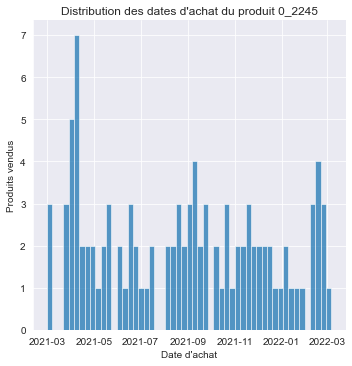

In [208]:
g = sns.displot(
    subset_2245, 
    x="Date",
    binwidth=7, # (1 classe = 1 semaine)
    #element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Produits vendus'
))
plt.title('Distribution des dates d\'achat du produit 0_2245')
plt.show(g)

# --> Les dates sont assez normalement réparties sur toutes l'année
# --> On ne peut pas se baser sur la date pour déterminer les données manquantes

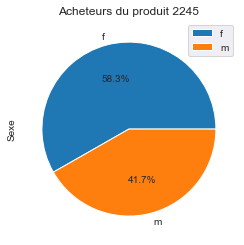

In [209]:
# Proportion des modalités de la variable 'Sexe' dans le sous-échantillon
a = subset_2245['Sexe'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%'
)
a.set(ylabel='Sexe')
plt.title('Acheteurs du produit 2245')
plt.show(a)

# --> Presqu'autant d'hommes que de femmes ont acheté ce produit
# --> L'écart n'est pas assez net pour qu'on détermine des données à partir de cette variable

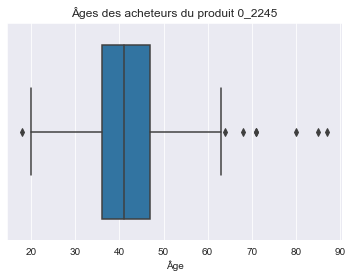

In [210]:
# Box plot sur 'Âge'
c = sns.boxplot(data=subset_2245, x='Âge')
c.set(xlabel='Âge')
plt.title('Âges des acheteurs du produit 0_2245')
plt.show(c)

In [211]:
# Indicateurs de la variable 'Âge'
indicateurs(subset_2245, 'Âge')

# --> 8% des acheteurs de ce produit ont 42 ans
# --> Le pourcentage est significatif, vu la taille limitée de l'échantillon
# --> On peut tenter de déterminer 'Catégorie' et 'Prix' à partir de 'Naissance'

Indicateurs de position : 
Mode(s) : [42] (fréquence : 8.7 %) 
Moyenne : 42.7 
Médiane : 41.0 
1er quartile : 36.0 
3ème quartile : 47.0 
Indicateurs de dispersion : 
Minimum : 18 
Maximum : 87 
Étendue : 69 
Variance : 137.4 
Écart-type :  11.7 
Coeff. de variation : 0.3 
Skewness : 1.5 ( distribution étalée à droite ) 
Kurtosis : 3.5 ( distribution moins aplatie que la normale gaussienne )


### Indicateurs : population totale
- L'année 1978 se situe dans le deuxième quartile de la population totale, et à la limite du 3ème : on vérifiera les indicateurs de ces 2 tranches
- Le mode de *'Catégorie'* pour ces 2 quartiles est 0 (fréquences supérieures à 70%) : on retient donc cette valeur

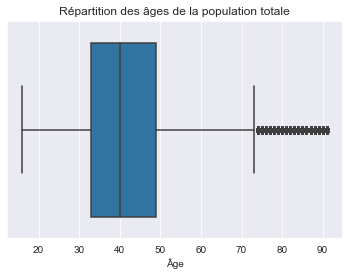

In [212]:
# Indicateurs de position de la variable 'Naissance'
c = sns.boxplot(data=data, x='Âge')
c.set(xlabel='Âge')
plt.title('Répartition des âges de la population totale')
plt.show(c)

# --> Les clients du produit 0_2245 appartiennent à l'espace entre Q1 et la médiane
# --> Ils sont situés à la limite de la médiane (analyser l'espace entre Q2 et Q3)

In [213]:
# Découpage de la population en 4 quartiles de la variable 'Naissance'
quartile_1 = data[data['Âge'] < data['Âge'].quantile(.25)]
quartile_2 = data[
    (data['Âge'] >= data['Âge'].quantile(.25))
    & (data['Âge'] < data['Âge'].quantile(.5))
]
quartile_3 = data[
    (data['Âge'] >= data['Âge'].quantile(.5))
    & (data['Âge'] < data['Âge'].quantile(.75))
]
quartile_4 = data[data['Âge'] >= data['Âge'].quantile(.75)]

# Ajout d'une colonne indiquant la tranche d'âge
data['Tranche âge'] = ''
data['Tranche âge'].loc[quartile_1.index] = 'A'
data['Tranche âge'].loc[quartile_2.index] = 'B'
data['Tranche âge'].loc[quartile_3.index] = 'C'
data['Tranche âge'].loc[quartile_4.index] = 'D'

data.sample(5)

c:\users\guifo\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie,Tranche âge
23213,0_602,2021-05-20 03:39:58.049103,s_36900,c_2769,m,1988,32,13.89,0.0,A
152993,0_1485,2021-09-21 16:56:13.922610,s_93316,c_4516,f,1959,61,18.99,0.0,D
223590,0_1420,2021-05-30 04:15:32.852080,s_41491,c_5479,f,1971,49,11.53,0.0,D
328630,0_1548,2021-07-16 09:39:41.852336,s_63012,c_5759,m,1990,30,9.66,0.0,A
81441,1_652,2021-08-11 07:59:01.438938,s_74219,c_6675,m,2003,17,27.52,1.0,A


In [214]:
# Indicateurs de catégorie du 2ème quartile de 'Naissance'
print(style.bold + style.green + 'Sous-échantillon : 2ème quartile de \'Âge\'\n' + style.end)
print(style.underline + style.red + 'Catégorie :' + style.end)
indicateurs(quartile_2, 'Catégorie')

# Indicateurs de catégorie du 3ème quartile de 'Naissance'
print('\n\n' + style.bold + style.green + 'Sous-échantillon : 3ème quartile de \'Âge\'\n' + style.end)
print(style.underline + style.red + 'Catégorie :' + style.end)
indicateurs(quartile_3, 'Catégorie')

# --> Pour 'Catégorie', la fréquence du mode est significative, et correspond à la médiane
# --> L'indicateur est quasiment le même pour le 2ème et le 3ème quartile
# --> On retient la catégorie 0 pour cette tranche d'âge

Sous-échantillon : 2ème quartile de 'Âge'

Catégorie :
Indicateurs de position : 
Mode(s) : [0.0] (fréquence : 76.6 %) 
Moyenne : 0.2 
Médiane : 0.0 
1er quartile : 0.0 
3ème quartile : 0.0 
Indicateurs de dispersion : 
Minimum : 0.0 
Maximum : 2.0 
Étendue : 2.0 
Variance : 0.2 
Écart-type :  0.4 
Coeff. de variation : 1.8 
Skewness : 1.3 ( distribution étalée à droite ) 
Kurtosis : 0.2 ( distribution moins aplatie que la normale gaussienne )


Sous-échantillon : 3ème quartile de 'Âge'

Catégorie :
Indicateurs de position : 
Mode(s) : [0.0] (fréquence : 77.2 %) 
Moyenne : 0.2 
Médiane : 0.0 
1er quartile : 0.0 
3ème quartile : 0.0 
Indicateurs de dispersion : 
Minimum : 0.0 
Maximum : 2.0 
Étendue : 2.0 
Variance : 0.2 
Écart-type :  0.4 
Coeff. de variation : 1.9 
Skewness : 1.4 ( distribution étalée à droite ) 
Kurtosis : 0.2 ( distribution moins aplatie que la normale gaussienne )


### Corrélation entre *'Catégorie'* et *'Prix'*
- Les 3 catégories sont corrélées à la variable *'Prix'*, chacune correspondant plus ou moins à une tranche de valeurs (le 1er caractère des valeurs de *'id_prod'* est d'ailleurs égal à *'Catégorie'*)
- Pour la catégorie 0, les indicateurs de *'Prix'* sont quasiment identiques entre les 2 quartiles d'âges
- La fréquence de leur mode (4%) est insuffisante : on retient donc la médiane, 9.99 (valeur identique pour l'ensemble de la population)

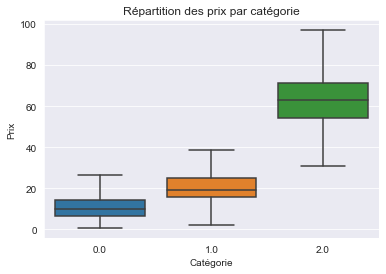

In [215]:
# Corrélation entre 'Catégorie' et 'Prix'
f = sns.boxplot(
    data=data, 
    x='Catégorie', 
    y='Prix',
    showfliers=False # Cacher les outliers pour une meilleure visibilité
)
plt.title('Répartition des prix par catégorie')
plt.show(f)

# --> La catégorie est corrélée au prix
# --> Les catégories correspondent à 3 gammes de prix ordonnées

In [216]:
# Dataframe-test
data_test = data.dropna()

# Réduction de la variable 'id_prod' à 2 caractères
data_test['id_prod'] = data_test['id_prod'].str[:2]

# Valeurs uniques pour chaque catégorie dans 'id_prod'
for i in data_test['Catégorie'].unique():
    print(
        'Valeur unique dans', i, ':',
        data_test[data_test['Catégorie']==i]['id_prod'].unique()
    )

# Les préfixes des identifiants produits correspondent à leur catégorie

Valeur unique dans 0.0 : ['0_']
Valeur unique dans 2.0 : ['2_']
Valeur unique dans 1.0 : ['1_']


<ipython-input-216-8234b3b5a788>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['id_prod'] = data_test['id_prod'].str[:2]


In [217]:
# Indicateurs de 'Prix' pour la modalité 0 de 'Catégorie', dans le 2ème quartile d'âge
print(
    style.bold + style.green + 'Sous-échantillon : 2ème quartile de \'Naissance\'' + style.end,
    style.underline + style.red + '\nIndicateurs de \'Prix\' pour la catégorie 0\n' + style.end
)
indicateurs(quartile_2[quartile_2['Catégorie']==0], 'Prix')

# Indicateurs de 'Prix' pour la modalité 0 de 'Catégorie', dans le 3ème quartile d'âge
print(
    style.bold + style.green + '\n\nSous-échantillon : 3ème quartile de \'Naissance\'' + style.end,
    style.underline + style.red + '\nIndicateurs de \'Prix\' pour la catégorie 0\n' + style.end
)
indicateurs(quartile_3[quartile_3['Catégorie']==0], 'Prix')

# --> La fréquence du mode pour 'price' (4.5%) n'est pas significative, vu la taille de l'échantillon
# --> On retient la médiane (9.99) comme prix

Sous-échantillon : 2ème quartile de 'Naissance' 
Indicateurs de 'Prix' pour la catégorie 0

Indicateurs de position : 
Mode(s) : [4.99] (fréquence : 4.4 %) 
Moyenne : 10.7 
Médiane : 9.99 
1er quartile : 6.3 
3ème quartile : 14.4 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 39.99 
Étendue : 39.4 
Variance : 24.2 
Écart-type :  4.9 
Coeff. de variation : 0.5 
Skewness : 0.4 ( distribution étalée à droite ) 
Kurtosis : -0.3 ( distribution plus aplatie que la normale gaussienne )


Sous-échantillon : 3ème quartile de 'Naissance' 
Indicateurs de 'Prix' pour la catégorie 0

Indicateurs de position : 
Mode(s) : [4.99] (fréquence : 4.5 %) 
Moyenne : 10.6 
Médiane : 9.99 
1er quartile : 6.2 
3ème quartile : 14.4 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 40.99 
Étendue : 40.4 
Variance : 24.3 
Écart-type :  4.9 
Coeff. de variation : 0.5 
Skewness : 0.4 ( distribution étalée à droite ) 
Kurtosis : -0.4 ( distribution plus aplatie que la normale gaussienne )


In [218]:
# Vérification de la médiane de prix de la catégorie 0, sur toute la population
print(
    'Prix médian de la catégorie 0, sur la population totale :',
    data[data['Catégorie']==0]['Prix'].median()
)

# --> La médiane de prix correpond à celles des 2 quartiles étudiés

Prix médian de la catégorie 0, sur la population totale : 9.99


### Remplacement des valeurs

In [219]:
# Remplacement des valeurs manquantes du produit 0_2245
data['Catégorie'].replace(np.nan, 0, inplace=True)
data['Prix'].replace(np.nan, 9.99, inplace=True)

# Affichage du produit 0_2245
data[data['id_prod']=='0_2245']

,id_prod,Date,session_id,client_id,Sexe,Naissance,Âge,Prix,Catégorie,Tranche âge
6235,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,m,1972,48,9.99,0.0,C
10802,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,m,1973,47,9.99,0.0,C
14051,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,f,1975,45,9.99,0.0,C
17486,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,f,1982,38,9.99,0.0,B
21078,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,m,1988,32,9.99,0.0,A
...,...,...,...,...,...,...,...,...,...,...
322597,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,f,1979,41,9.99,0.0,C
329300,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,1983,37,9.99,0.0,B
330371,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,f,1984,36,9.99,0.0,B
335405,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,f,1973,47,9.99,0.0,C


## Valeurs manquantes : dates
- Plusieurs semaines du mois d'octobre n'affichent aucun individu pour la catégorie 1
- On met de côté les transactions du mois d'octobre (toutes catégories confondues), pour ne pas fausser les analyses

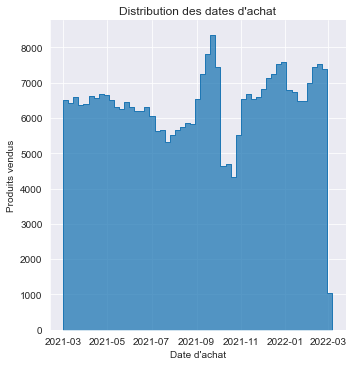

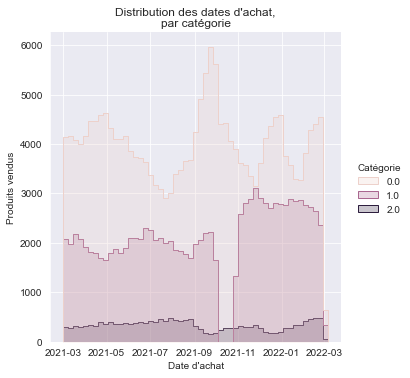

In [220]:
# Distribution des dates d'achats
g = sns.displot(
    data, 
    x="Date",
    binwidth=7, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Produits vendus'
))
plt.title('Distribution des dates d\'achat')
plt.show(g)

# Distribution des dates d'achats, par catégorie
g = sns.displot(
    data, 
    x="Date",
    hue='Catégorie', 
    binwidth=7, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Produits vendus'
))
plt.title('Distribution des dates d\'achat,\npar catégorie')
plt.show(g)

# --> Il manque des dates au mois d'octobre pour la catégorie 1
# --> On va éliminer les transactions des autres catégories pour le mois d'octobre

In [221]:
# Nombre de lignes avant suppression
len_before = len(data)
print('Nombre de lignes avant suppression :', len_before)

# Suppression des valeurs du mois d'octobre, toutes catégories confondues
data.drop(data[data['Date'].dt.month==10].index, inplace=True)

# Nombre de lignes après suppression
len_after = len(data)
print(
    'Nombre de lignes après suppression :', len_after, '\n',
    round(((len_before - len_after) / len_before * 100), 1),
    '% du dataset écarté'
)

Nombre de lignes avant suppression : 336816
Nombre de lignes après suppression : 315232 
 6.4 % du dataset écarté


# Analyse : axe produits

## Catégories
- Les catégories correspondent à 3 gammes de prix ordonnées :
    - Catégorie 0 : livres les moins chers (médiane à 10, écart-type de 7.5)
    - Catégorie 1 : prix intermédiaires (moyenne et médiane vers 20, écart-type égal à celui de la catégorie 0)
    - Catégorie 2 : prix supérieurs (indicateurs autour de 70, avec un écart-type de 40)
- Le volume des transactions est de 60% pour la catégorie 0, et seulement 5% pour la catégorie 2
- La proportion du stock pour chaque catégorie (**produits**) diffère de celle des transactions enregistrées pour chacune :
    - Catégorie 0 : 70% du stock, 60% des ventes, 80% des références invendues
    - Catégorie 1 : 23% du stock, 35% des ventes, 8% des invendus
    - Catégorie 2 : 7% du stock, 5% des ventes, 12% des invendus
- Proportionnellement au stock, la catégorie 1 rencontre le plus de succès, et affiche le moins d'invendus

In [222]:
# Coefficient de corrélation de Pearson
pearson(data, 'Catégorie', 'Prix')

# --> Forte corrélation

Coeff. de corrélation de Pearson :
Sur data, entre 'Catégorie' et 'Prix' : 0.67 



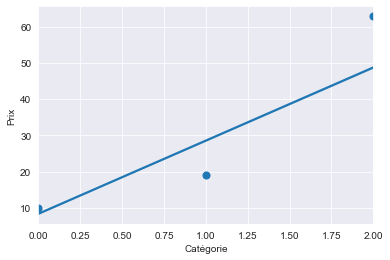

In [223]:
# Régression linéaire
g = sns.regplot(
    data=data, 
    x="Catégorie",
    y='Prix',
    x_estimator=np.median
    )

plt.show(g)

# --> La catégorie est corrélée au prix

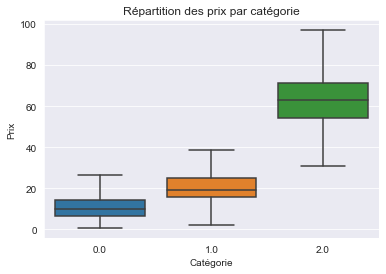

In [224]:
# Répétition du box plot de la partie Nettoyage
f = sns.boxplot(
    data=data, 
    x='Catégorie', 
    y='Prix',
    showfliers=False 
)
plt.title('Répartition des prix par catégorie')
plt.show(f)

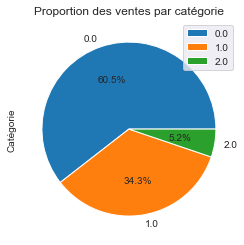

In [225]:
# Proportion des ventes par catégorie
a = data['Catégorie'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%'
)
plt.title('Proportion des ventes par catégorie')
plt.show(a)

In [226]:
# Dataset principal
# Indicateurs de la variable 'Prix', par catégorie
print(style.green + 'Dataset :' + style.bold, 'data', style.end, '\n')
indicateurs_bivaries(data, 'Catégorie', 'Prix')

Dataset : data  

Modalité : 0.0 (fréquence : 60.5 %)

Indicateurs de position : 
Mode(s) : [4.99] (fréquence : 4.4 %) 
Moyenne : 10.6 
Médiane : 9.99 
1er quartile : 6.3 
3ème quartile : 14.4 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 40.99 
Étendue : 40.4 
Variance : 24.3 
Écart-type :  4.9 
Coeff. de variation : 0.5 
Skewness : 0.4 ( distribution étalée à droite ) 
Kurtosis : -0.4 ( distribution plus aplatie que la normale gaussienne )


Modalité : 2.0 (fréquence : 5.2 %)

Indicateurs de position : 
Mode(s) : [68.99] (fréquence : 6.2 %) 
Moyenne : 75.2 
Médiane : 62.83 
1er quartile : 54.0 
3ème quartile : 71.2 
Indicateurs de dispersion : 
Minimum : 30.99 
Maximum : 300.0 
Étendue : 269.0 
Variance : 1536.2 
Écart-type :  39.2 
Coeff. de variation : 0.5 
Skewness : 2.3 ( distribution étalée à droite ) 
Kurtosis : 5.5 ( distribution moins aplatie que la normale gaussienne )


Modalité : 1.0 (fréquence : 34.3 %)

Indicateurs de position : 
Mode(s) : [15.99] (fréquence : 

In [227]:
# Dataset produits (analyse du stock)
# Indicateurs de la variable 'Prix', par catégorie
print(style.green + 'Dataset :' + style.bold, 'produits', style.end, '\n')
indicateurs_bivaries(produits, 'Catégorie', 'Prix')

Dataset : produits  

Modalité : 0 (fréquence : 70.2 %)

Indicateurs de position : 
Mode(s) : [4.99] (fréquence : 3.5 %) 
Moyenne : 11.7 
Médiane : 10.32 
1er quartile : 5.6 
3ème quartile : 16.6 
Indicateurs de dispersion : 
Minimum : -1.0 
Maximum : 40.99 
Étendue : 42.0 
Variance : 57.3 
Écart-type :  7.6 
Coeff. de variation : 0.6 
Skewness : 0.8 ( distribution étalée à droite ) 
Kurtosis : 0.3 ( distribution moins aplatie que la normale gaussienne )


Modalité : 1 (fréquence : 22.5 %)

Indicateurs de position : 
Mode(s) : [22.99, 32.99] (fréquence : 2.2 %) 
Moyenne : 25.5 
Médiane : 22.99 
1er quartile : 13.4 
3ème quartile : 34.0 
Indicateurs de dispersion : 
Minimum : 2.0 
Maximum : 80.99 
Étendue : 79.0 
Variance : 237.6 
Écart-type :  15.4 
Coeff. de variation : 0.6 
Skewness : 0.8 ( distribution étalée à droite ) 
Kurtosis : 0.3 ( distribution moins aplatie que la normale gaussienne )


Modalité : 2 (fréquence : 7.3 %)

Indicateurs de position : 
Mode(s) : [50.99, 68.99, 69.9

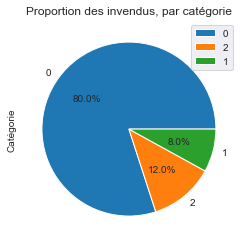

In [228]:
# Liste des produits invendus
invendus = produits[~produits['id_prod'].isin(data['id_prod'])]

# Proportion des catégories pour les invendus
a = invendus['Catégorie'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%'
)
plt.title('Proportion des invendus, par catégorie')
plt.show(a)

## Dates d'achat
- La catégorie 2 a pour particularité un creux pendant les fêtes de fin d'année

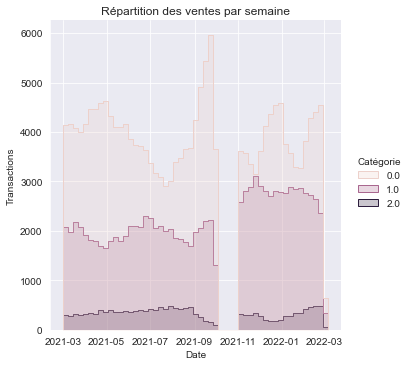

In [229]:
# Répartition des ventes par date et catégorie
g = sns.displot(data, x='Date', hue='Catégorie', binwidth=7, element='step')
g.set(ylabel='Transactions')
plt.title('Répartition des ventes par semaine')
plt.show(g)

# --> Catégorie 0 : pics aux mois mars, mai, septembre et décembre
# --> Catégorie 0 : pic du mois de septembre largement supérieur aux autres
# --> Catégorie 1 : pics modérés autour de l'été et des fêtes de fin d'année
# --> Catégorie 2 : chute des ventes après le mois de septembre

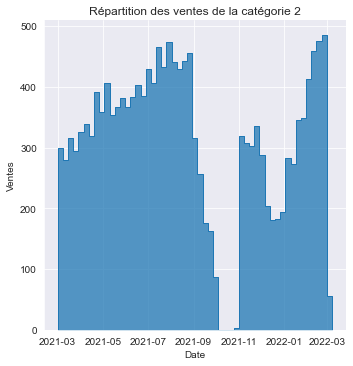

In [230]:
# Répartition des ventes de la catégorie 2, par date
g = sns.displot(
    data[data['Catégorie']==2], 
    x='Date', 
    binwidth=7, 
    element='step'
)
g.set(ylabel='Ventes')
plt.title('Répartition des ventes de la catégorie 2')
plt.show(g)

# --> Creux pendant les fêtes de fin d'année

Coeff. de corrélation de Pearson :
Sur data, entre 'Mois' et 'Prix' : -0.01 



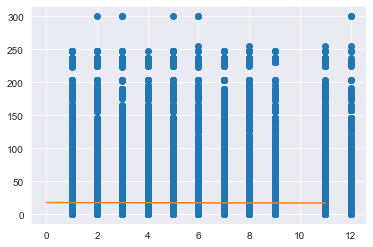

In [271]:
# Ajout d'une colonne mois
data['Mois'] = pd.DatetimeIndex(data['Date']).month



pearson(data, 'Mois', 'Prix')
regression_lineaire(data, 'Mois', 'Prix')


#sns.regplot(x="Prix", y="Catégorie", data=particuliers)
#sns.lmplot(x="Prix", y="Catégorie", data=particuliers)

# Analyse : axe clients

## Distinction entre particuliers et professionnels
- 4 clients (sur 8500) agrégent à eux seuls 7% du chiffre d'affaires et des transactions, avec des dépenses supérieures à 50,000 (le 5ème client n'a dépensé que 2,400)
- On peut supposer que ces 4 clients sont des professionnels
- Pour l'analyse, on dissocie la population en 2 groupes : ces 4 clients a priori professionnels, et les particuliers

In [232]:
# Agrégation des dépenses par client
depenses_par_clients = data.pivot_table(
    index='client_id', 
    values='Prix', 
    aggfunc='sum'
    ).sort_values(by='Prix', ascending=False).reset_index()
    
depenses_par_clients

# --> Les 4 premiers clients se démarquent nettement

,client_id,Prix
0,c_1609,150729.07
1,c_4958,137151.48
2,c_6714,69402.15
3,c_3454,52740.66
4,c_8026,2434.49
...,...,...
8593,c_8032,8.82
8594,c_890,6.08
8595,c_1675,5.57
8596,c_8114,4.99


In [233]:
# Échantillon ne contenant que les 4 gros clients
professionnels = data[data['client_id'].isin(
    depenses_par_clients.loc[0:3]['client_id'])]

# Échantillon excluant les 4 gros clients
particuliers = data.drop(professionnels.index)

# Noms des variables
particuliers.name = 'particuliers'
professionnels.name = 'professionnels'

# Proportion des transactions entre type de clients
print(
    style.bold + 'Proportions des échantillons :' + style.end, '\n'
    'Professionnels :',
    round((len(professionnels) / len(data) * 100), 1), '% des transactions\n'
    'Particuliers :',
    round((len(particuliers) / len(data) * 100), 1), '% des transactions'
)

Proportions des échantillons : 
Professionnels : 6.9 % des transactions
Particuliers : 93.1 % des transactions


In [234]:
# Chiffre d'affaires des 4 gros clients
ca_professionnels = professionnels['Prix'].sum()

# Chiffre d'affaires total
ca_total = data['Prix'].sum()

print(
    'Les 4 clients professionnels représentent',
    round((ca_professionnels / ca_total * 100), 1),
    '% du CA total'
)

# --> Les 4 clients représentent une part significative du CA
# --> Pour être juste, l'analyse doit être scindée en 2 échantillons de clients
# --> Les variables 'Sexe' et 'Naissance' ne seront pas analysées chez les professionnels

Les 4 clients professionnels représentent 7.5 % du CA total


## Clients professionnels
- L'âge et le sexe renseignés pour chacun de ces 4 clients ne sont pas pertinents : on écarte ces variables de l'analyse 

### Prix et panier
- Prix moyen des livres achetés par les professionnels : 19
- Panier moyen des clients professionnels : 25.5

In [235]:
# Indicateurs de la variable 'Prix'
indicateurs(professionnels, 'Prix')

# --> Prix médian de toutes les transactions : 13.99
# --> Prix moyen : 19

Indicateurs de position : 
Mode(s) : [15.99] (fréquence : 3.0 %) 
Moyenne : 19.0 
Médiane : 13.99 
1er quartile : 9.0 
3ème quartile : 19.7 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 300.0 
Étendue : 299.4 
Variance : 446.4 
Écart-type :  21.1 
Coeff. de variation : 1.1 
Skewness : 4.8 ( distribution étalée à droite ) 
Kurtosis : 33.3 ( distribution moins aplatie que la normale gaussienne )


In [236]:
# Paniers moyens des professionnels
paniers_professionnels = professionnels.pivot_table(index='client_id', aggfunc='mean')['Prix']

print(
    style.bold + 'Paniers moyens des clients professionnels :' + style.end + '\n\n',
    paniers_professionnels
)

Paniers moyens des clients professionnels :

 client_id
c_1609    12.731571
c_3454    16.801739
c_4958    55.820708
c_6714    16.567713
Name: Prix, dtype: float64


In [237]:
# Panier moyen des professionnels
print(
    'Panier moyen des clients professionnels :',
    round((paniers_professionnels.mean()), 1)
)

Panier moyen des clients professionnels : 25.5


### Catégories

In [238]:
# Indicateurs bivariés sur 'Catégorie' et 'Prix'
indicateurs_bivaries(professionnels, 'Catégorie', 'Prix')

# --> Les professionnels achètent le plus fréquemment la catégorie 0

Modalité : 0.0 (fréquence : 59.7 %)

Indicateurs de position : 
Mode(s) : [4.99] (fréquence : 4.3 %) 
Moyenne : 10.7 
Médiane : 9.99 
1er quartile : 6.3 
3ème quartile : 14.4 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 39.99 
Étendue : 39.4 
Variance : 24.4 
Écart-type :  4.9 
Coeff. de variation : 0.5 
Skewness : 0.4 ( distribution étalée à droite ) 
Kurtosis : -0.4 ( distribution plus aplatie que la normale gaussienne )


Modalité : 1.0 (fréquence : 32.4 %)

Indicateurs de position : 
Mode(s) : [15.99] (fréquence : 4.4 %) 
Moyenne : 20.5 
Médiane : 19.44 
1er quartile : 15.8 
3ème quartile : 25.0 
Indicateurs de dispersion : 
Minimum : 2.0 
Maximum : 80.99 
Étendue : 79.0 
Variance : 56.9 
Écart-type :  7.5 
Coeff. de variation : 0.4 
Skewness : 1.9 ( distribution étalée à droite ) 
Kurtosis : 9.8 ( distribution moins aplatie que la normale gaussienne )


Modalité : 2.0 (fréquence : 7.8 %)

Indicateurs de position : 
Mode(s) : [68.99] (fréquence : 6.5 %) 
Moyenne : 75.8 


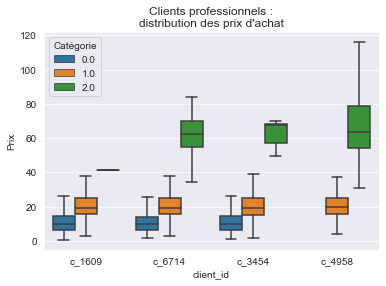

In [239]:
# Distribution des prix d'achat, par client
g = sns.boxplot(
    x='client_id',
    y='Prix',
    hue='Catégorie',
    data=professionnels,
    showfliers=False
)
plt.title('Clients professionnels :\ndistribution des prix d\'achat')
plt.show(g)

# --> Les 3 plus gros clients achètent en parts égales dans la catégorie 0
# --> Les 4 clients achètent en parts quasi-égales dans la catégorie 1
# --> Le 4ème client n'achète pas du tout dans la catégorie 0
# --> Le 4ème client consomme majoritairement la catégorie 2
# --> Le plus gros client n'achète quasiment rien dans la catégorie 2

### Dates d'achat

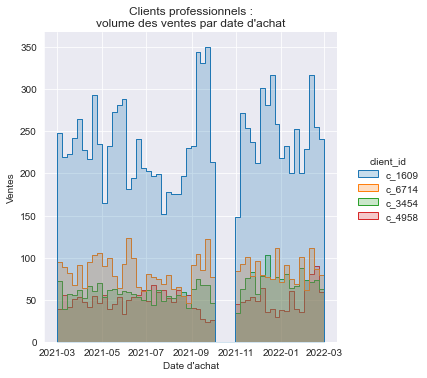

In [240]:
# Nombre de ventes, par date d'achat et client
g = sns.displot(
    professionnels, 
    x="Date",
    hue='client_id', 
    bins=54, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Ventes'
))
plt.title('Clients professionnels :\nvolume des ventes par date d\'achat')
plt.show(g)

# --> Le plus gros client a un pic d'achat au mois de septembre
# --> Et un 2ème pic moins haut au mois de décembre

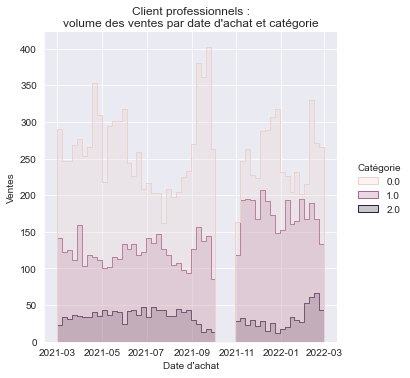

In [241]:
# Nombre de ventes, par date d'achat et catégorie
g = sns.displot(
    professionnels, 
    x="Date",
    hue='Catégorie', 
    bins=54, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Ventes'
))
plt.title('Client professionnels :\nvolume des ventes par date d\'achat et catégorie')
plt.show(g)

# --> Catégorie 0 : pic d'achat au mois de septembre, correspondant au plus gros client
# --> Catégorie 1 : pic d'achat autour des fêtes de fin d'année

## Clients particuliers

### Prix et panier
- Le prix médian de toutes les transactions est de 13.99 (correspond à l'écart-type supérieur de la cat. 0, et l'écart-type inférieur de la cat. 1)
- Prix moyen des articles achetés par les particuliers : 17.3
- Panier moyen des particuliers : 21.9

In [242]:
# Indicateurs de la variable 'Prix'
indicateurs(particuliers, 'Prix')

# --> Prix médian de toutes les transactions : 13.99
# --> Prix moyen : 19

Indicateurs de position : 
Mode(s) : [15.99] (fréquence : 3.2 %) 
Moyenne : 17.3 
Médiane : 13.99 
1er quartile : 9.0 
3ème quartile : 19.0 
Indicateurs de dispersion : 
Minimum : 0.62 
Maximum : 300.0 
Étendue : 299.4 
Variance : 309.5 
Écart-type :  17.6 
Coeff. de variation : 1.0 
Skewness : 5.5 ( distribution étalée à droite ) 
Kurtosis : 46.6 ( distribution moins aplatie que la normale gaussienne )


In [243]:
# Panier moyens des particuliers
print(
    style.bold + 'Panier moyens des clients particuliers :' + style.end,
    round((particuliers.pivot_table(index='client_id', aggfunc='mean')['Prix'].mean()), 1)
)

Panier moyens des clients particuliers : 21.9


### Par sexe
- les femmes achètent très légèrement plus que les hommes
- les proportions de vente sont les mêmes pour chaque catégorie, avec les mêmes indicateurs de prix
- les 2 groupes achètent autant à chaque moment de l'année
- les années de naissance se répartissent de la même manière chez les hommes et chez les femmes
- Le sexe n'indique aucune typologie de clients particulière 

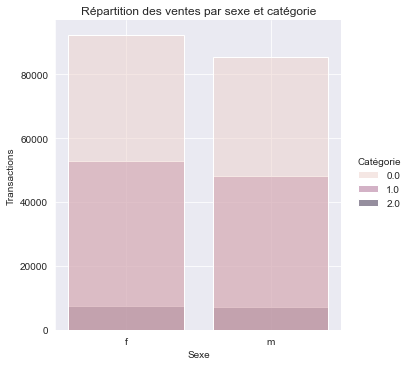

In [244]:
# Ventes et catégories, par sexe
g = sns.displot(particuliers, x="Sexe", hue='Catégorie', shrink=.8)
g.set(ylabel='Transactions')
plt.title('Répartition des ventes par sexe et catégorie')
plt.show(g)

# --> Les 2 sexes ont le même volume d'achats
# --> Les 2 sexes achètent autant dans chaque catégorie

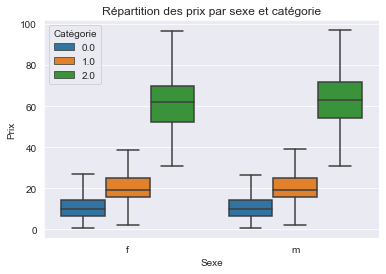

In [245]:
# Répartition des prix d'achat, par sexe
g = sns.boxplot(
    data=particuliers, 
    x="Sexe", 
    y='Prix', 
    hue='Catégorie',
    showfliers=False
)

plt.title('Répartition des prix par sexe et catégorie')
plt.show(g)

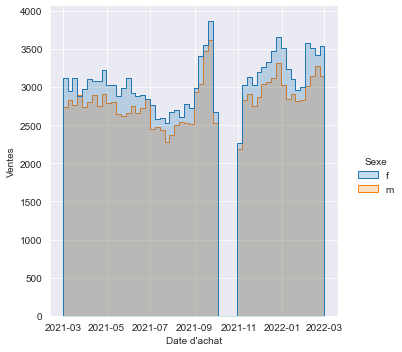

In [246]:
# Sexe / Date d'achat
g = sns.displot(
    data=particuliers, 
    x="Date", 
    hue='Sexe', 
    bins=54, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Ventes'
))
plt.show(g)

# Les histogrammes des 2 sexes ont les mêmes formes
# Les 2 groupes achètent autant aux mêmes périodes de l'année

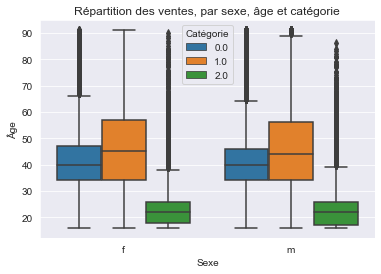

In [247]:
# Répartition des ventes, par âge et par sexe
g = sns.boxplot(
    data=particuliers, 
    x="Sexe", 
    y='Âge',
    hue='Catégorie'
    # showfliers=False
)

plt.title('Répartition des ventes, par sexe, âge et catégorie')
plt.show(g)

# --> Les années se répartissent de la même façon pour les 2 sexes

### Par âge
- La catégorie 1 n'est pas corrélée à l'âge
- Les 2 autres catégories ont un lien avec l'âge
    - L'âge des clients de la catégorie 2 se démarque nettement (nés aux environs de 2000)
- L'âge n'est pas corrélé à la date d'achat

In [248]:
# Coefficient de corrélation de Pearson
pearson(particuliers, 'Âge', 'Prix')

# --> Faible corrélation entre l'âge et le prix d'achat
# --> Mais les personnes jeunes ont plus tendance à acheter des livres plus chers

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Âge' et 'Prix' : -0.2 



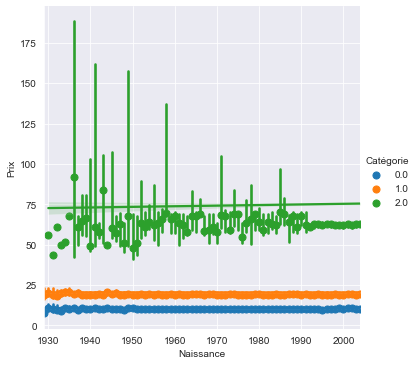

In [249]:
# Régression linéaire entre 'Naissance' et 'Prix'
g = sns.lmplot(
    data=particuliers, 
    x="Naissance",
    y='Prix',
    hue='Catégorie',
    x_estimator=np.median,
    )

plt.show(g)

# --> Il y a a priori une corrélation entre l'âge et le prix d'achat médian

In [250]:
# Coefficient de corrélation de Pearson
pearson(particuliers, 'Âge', 'Catégorie')

# --> Plus faible corrélation encore sur la catégorie que sur le prix
# --> Parce que le coeff. de Pearson entre catégorie est prix n'est pas égal à 1

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Âge' et 'Catégorie' : -0.08 



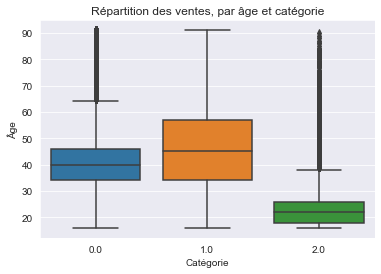

In [251]:
# Répartition des ventes, par âge et catégorie
g = sns.boxplot(
    data=particuliers, 
    x="Catégorie", 
    y='Âge',
    # showfliers=False
)

plt.title('Répartition des ventes, par âge et catégorie')
plt.show(g)

In [252]:
# Indicateurs de la variable 'Naissance', par catégorie
indicateurs_bivaries(particuliers, 'Catégorie', 'Naissance')

# --> Cat. 0 : médiane et moyenne autour de 1980
# --> Cat. 1 : clients légèrement plus âgés que la cat.0 (d'environ 5 ans)
# --> Cat. 2 :
# -->     Fréquence du mode (2004) importante (18%)
# -->     Indicateurs autour de l'année 2000
# -->     Kurtosis de la catégorie est lui aussi très marqué

# --> Écarts-types de 10 ans pour les catégories 0 et 2, 15 ans pour la cat. 1
# -->     Individus à tendance plus âgée pour la cat. 1
# -->     L'âge des individus de la cat. 2 se détache des autres 

Modalité : 0.0 (fréquence : 60.6 %)

Indicateurs de position : 
Mode(s) : [1988] (fréquence : 4.9 %) 
Moyenne : 1978.2 
Médiane : 1980.0 
1er quartile : 1974.0 
3ème quartile : 1986.0 
Indicateurs de dispersion : 
Minimum : 1929 
Maximum : 2004 
Étendue : 75 
Variance : 132.6 
Écart-type :  11.5 
Coeff. de variation : 0.0 
Skewness : -1.0 ( distribution étalée à gauche ) 
Kurtosis : 1.6 ( distribution moins aplatie que la normale gaussienne )


Modalité : 2.0 (fréquence : 5.0 %)

Indicateurs de position : 
Mode(s) : [2004] (fréquence : 18.5 %) 
Moyenne : 1996.3 
Médiane : 1998.0 
1er quartile : 1994.0 
3ème quartile : 2002.0 
Indicateurs de dispersion : 
Minimum : 1930 
Maximum : 2004 
Étendue : 74 
Variance : 92.6 
Écart-type :  9.6 
Coeff. de variation : 0.0 
Skewness : -3.0 ( distribution étalée à gauche ) 
Kurtosis : 11.1 ( distribution moins aplatie que la normale gaussienne )


Modalité : 1.0 (fréquence : 34.4 %)

Indicateurs de position : 
Mode(s) : [1979] (fréquence : 2.8 %) 
M

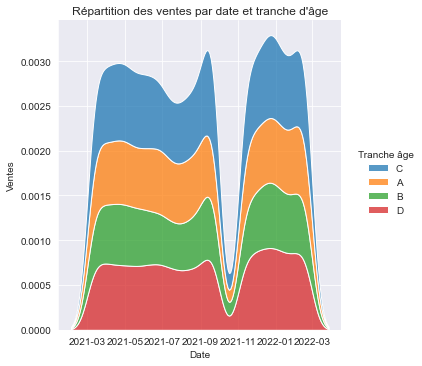

In [253]:
g = sns.displot(
    data=particuliers, 
    x='Date', 
    hue='Tranche âge', 
    kind='kde', 
    multiple='stack')
g.set(ylabel='Ventes')
plt.title('Répartition des ventes par date et tranche d\'âge')
plt.show(g)

# --> Les 4 quartiles d'âge achètent autant à chaque moment de l'année

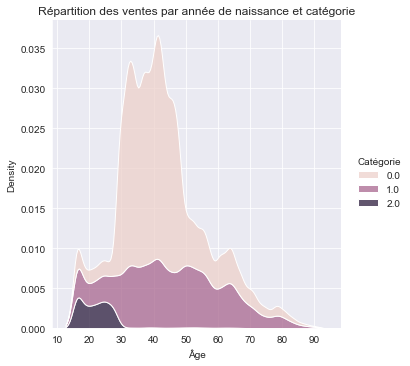

In [254]:
g = sns.displot(
    data=particuliers, 
    x='Âge', 
    hue='Catégorie', 
    kind='kde', 
    multiple='stack'
)
#g.set(ylabel='Ventes')
plt.title('Répartition des ventes par année de naissance et catégorie')
plt.show(g)

# --> Les catégories 0 et 1 ont les mêmes formes d'histogramme
# --> Excepté un pic autour de 1980 pour la catégorie 0
# --> La catégorie 2 est majoritairement achetée par des clients nés après 1990

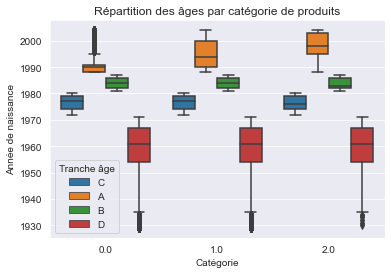

In [255]:
# Corrélation entre 'Catégorie' et 'Naissance'
e = sns.boxplot(data=particuliers, x='Catégorie', y='Naissance', hue='Tranche âge')
e.set(xlabel='Catégorie', ylabel='Année de naissance')
plt.title('Répartition des âges par catégorie de produits')
plt.show(e)

# --> Certaines années de naissance sont plus corrélées que d'autres à certaines catégories
# --> Les individus entre Q1 et Q2 sont plus susceptibles d'acheter les catégories 0, voire 1

### Dates d'achat
- Les forme d'histogrammes pour chaque catégorie sont similaires à celles des clients professionnels

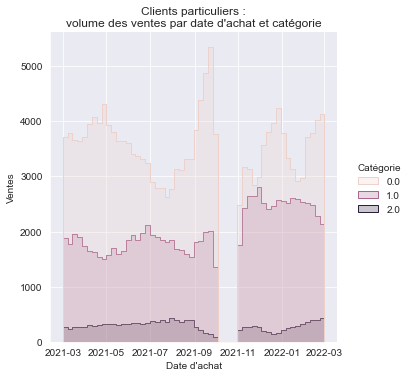

In [256]:
# Nombre de ventes, par date d'achat et catégorie
g = sns.displot(
    particuliers, 
    x="Date",
    hue='Catégorie', 
    bins=54, # (1 classe = 1 semaine)
    element='step'
    )
g = (g.set_axis_labels(
    'Date d\'achat',
    'Ventes'
))
plt.title('Clients particuliers :\nvolume des ventes par date d\'achat et catégorie')
plt.show(g)

# --> Catégorie 0 : pic d'achat au mois de septembre, comme pour les professionnels
# --> Catégorie 1 : pic d'achat autour des fêtes de fin d'année

# Conclusions


## Professionnels et particuliers

Les prix paniers moyens sont légèrement plus élevés chez les professionnels que chez les particuliers.

## Rééquilibrer les catégories

**Augmenter l'offre dans la catégorie 1**

Proportionnellement au stock, cette catégorie se vend beaucoup plus que la catégorie 0.

**Réduire le nombre de références dans la catégorie 0**

# /// Tests ///

In [257]:
data.columns

Index(['id_prod', 'Date', 'session_id', 'client_id', 'Sexe', 'Naissance',
       'Âge', 'Prix', 'Catégorie', 'Tranche âge', 'Mois'],
      dtype='object')

## Scatter plots
Quantitative / quantitative

### Prix par rapport à l'âge

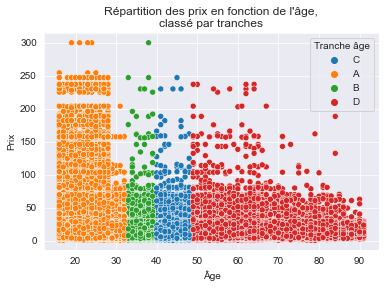

In [287]:
g = sns.scatterplot(
    data=particuliers, 
    x="Âge",
    y='Prix', 
    hue='Tranche âge'
    )
plt.title('Répartition des prix en fonction de l\'âge,\nclassé par tranches')
plt.show(g)

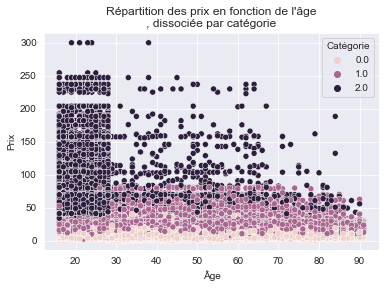

In [288]:
g = sns.scatterplot(
    data=particuliers, 
    x="Âge",
    y='Prix', 
    hue='Catégorie'
    )
plt.title('Répartition des prix en fonction de l\'âge\n, dissociée par catégorie')
plt.show(g)

### Prix par rapport à la date

c:\users\guifo\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


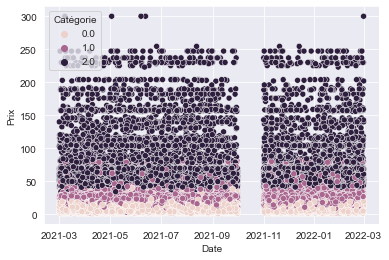

In [289]:
g = sns.scatterplot(
    data=particuliers, 
    x="Date",
    y='Prix', 
    hue='Catégorie'
    )
#plt.title('Répartition des prix en fonction de l\'âge,\nclassé par tranches')
plt.show(g)

### Date par rapport à l'âge

c:\users\guifo\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


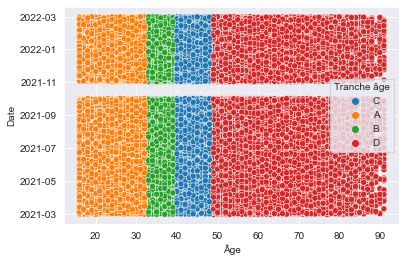

In [290]:
g = sns.scatterplot(
    data=particuliers, 
    x="Âge",
    y='Date', 
    hue='Tranche âge'
    )
#plt.title('Répartition des prix en fonction de l\'âge,\nclassé par tranches')
plt.show(g)

## Pearson + régression linéaire

In [291]:
# Régression linéaire avec Matplotlib
import statsmodels.api as sm
def regression_lineaire(df, variable_1, variable_2):
    Y = df[variable_2]
    X = df[[variable_1]]
    X = X.copy()
    X['intercept'] = 1

    result = sm.OLS(Y, X).fit()

    a, b = result.params[variable_1], result.params['intercept']

    # Pour éviter 'OverflowError'
    plt.rcParams['agg.path.chunksize'] = 10000

    plt.plot(df[variable_1], df[variable_2], 'o')

    largeur_droite = max(df[variable_1])

    plt.plot(
        np.arange(largeur_droite),
        [a * x+b for x in np.arange(largeur_droite)]
    )

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Prix' et 'Catégorie' : 0.67 



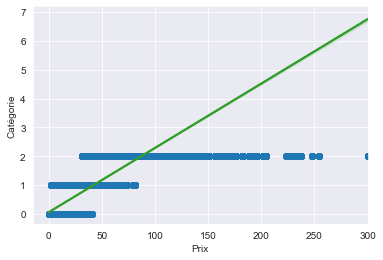

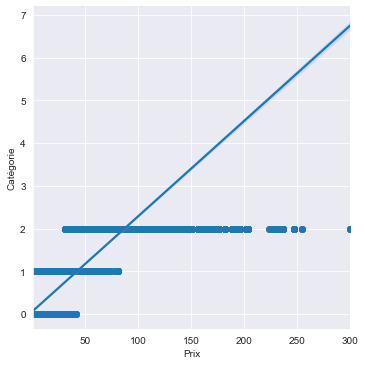

In [292]:
pearson(particuliers, 'Prix', 'Catégorie')
regression_lineaire(particuliers, 'Prix', 'Catégorie')
sns.regplot(x="Prix", y="Catégorie", data=particuliers)
sns.lmplot(x="Prix", y="Catégorie", data=particuliers)

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Âge' et 'Prix' : -0.2 



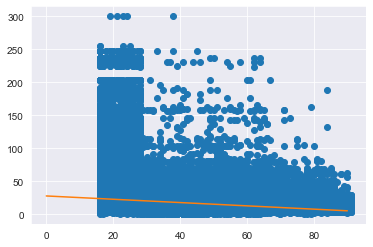

In [293]:
pearson(particuliers, 'Âge', 'Prix')
regression_lineaire(particuliers, 'Âge', 'Prix')

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Mois' et 'Prix' : -0.01 



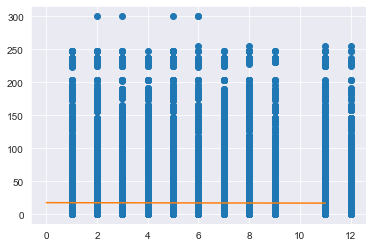

In [294]:
pearson(particuliers, 'Mois', 'Prix')
regression_lineaire(particuliers, 'Mois', 'Prix')

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Âge' et 'Naissance' : -1.0 



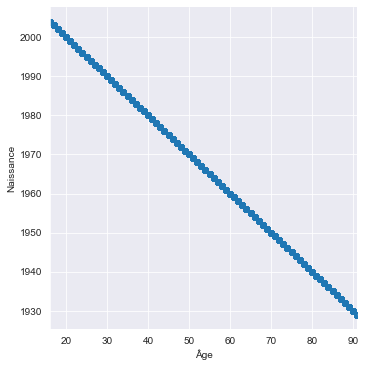

In [295]:
pearson(particuliers, 'Âge', 'Naissance')
sns.lmplot(x="Âge", y="Naissance", data=particuliers)

In [296]:


pearson(particuliers, 'Mois', 'Prix')
pearson(particuliers, 'Mois', 'Catégorie')
pearson(particuliers, 'Mois', 'Âge')

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Mois' et 'Prix' : -0.01 

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Mois' et 'Catégorie' : -0.01 

Coeff. de corrélation de Pearson :
Sur particuliers, entre 'Mois' et 'Âge' : 0.01 



## Box plot + discrétisation

In [305]:
# Box plot avec discrétisation de données continues

def boxplot_discretisation(df, variable_1, taille_classe, variable_2):
    
    # Taille des tranches
    taille_classe = taille_classe

    # Conteneur des données agrégées
    groupes = []

    # Calculer les tranches
    tranches = np.arange(0, max(df[variable_1]), taille_classe)

    # Décaler les tranches d'une demi taille de classe
    #tranches += taille_classe/2

    # Associer chaque individu à son index de classe
    indices = np.digitize(df[variable_1], tranches)

    # Pour chaque tranche, ind recoit le n° de la tranche
    # et tr la tranche en question
    for ind, tr in enumerate(tranches):
        # Sélection des individus de la tranche ind
        individus = df.loc[indices == ind, variable_2]
        if len(individus) > 0:
            g = {
                'valeurs': individus,
                'centre_classe': tr-(taille_classe / 2),
                'taille': len(individus),
                'quartiles': [np.percentile(individus, p) for p in [25, 50, 75]]
            }
            groupes.append(g)

    # Box plot
    plt.boxplot(
        [g['valeurs'] for g in groupes],
        positions = [g['centre_classe'] for g in groupes],
        #showfliers=False,
        widths = taille_classe * .85
    )
    plt.show()

    for g in groupes:
        plt.text(
            g['centre_classe'],
            0,
            '(n={})'.format(g['taille']),
            horizontalalignment = 'center',
            verticalalignment = 'top'
        )

    # Quartiles    
    for n_quartile in range(3):
        plt.plot(
            [g['centre_classe'] for g in groupes],
            [g['quartiles'][n_quartile] for g in groupes]
        )

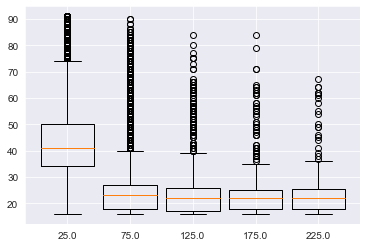

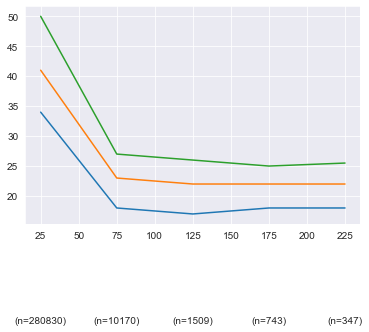

In [306]:
boxplot_discretisation(particuliers, 'Prix', 50, 'Âge')

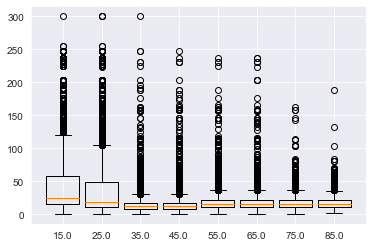

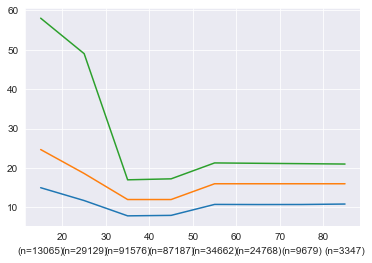

In [308]:
boxplot_discretisation(particuliers, 'Âge', 10, 'Prix')

## Régression linéaire

In [298]:
import datetime as dt

In [299]:
test = data.sort_values('Date')
r = []
last_date = max(data['Date'])

for i, row in test.iterrows():
    days = (row['Date'] - last_date).days
    if days == 0:
        r.append(r[-1])
    else


SyntaxError: invalid syntax (<ipython-input-299-182f01f90e68>, line 9)